In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train= pd.read_csv('Train.csv')
df_test= pd.read_csv('Test.csv')

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#df_test

In [7]:
df_train.shape

(8523, 12)

In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Item_Weight is numerical column so we fill it with Mean Imputation

In [12]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [16]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [17]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [19]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Selecting features based on general requirements

In [21]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [22]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install dtale


Note: you may need to restart the kernel to use updated packages.


# EDA with Dtale Library

In [25]:
import dtale

In [26]:
dtale.show(df_test)

In [27]:
dtale.show(df_train)

# EDA using Pandas Profiling

In [28]:
from ydata_profiling import ProfileReport 

2024-07-30 07:19:30,558 - INFO     - Pandas backend loaded 2.2.2
2024-07-30 07:19:30,563 - INFO     - Numpy backend loaded 1.26.4
2024-07-30 07:19:30,564 - INFO     - Pyspark backend NOT loaded
2024-07-30 07:19:30,564 - INFO     - Python backend loaded


In [29]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [30]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA using Klib Library

In [31]:
import klib

GridSpec(6, 5)

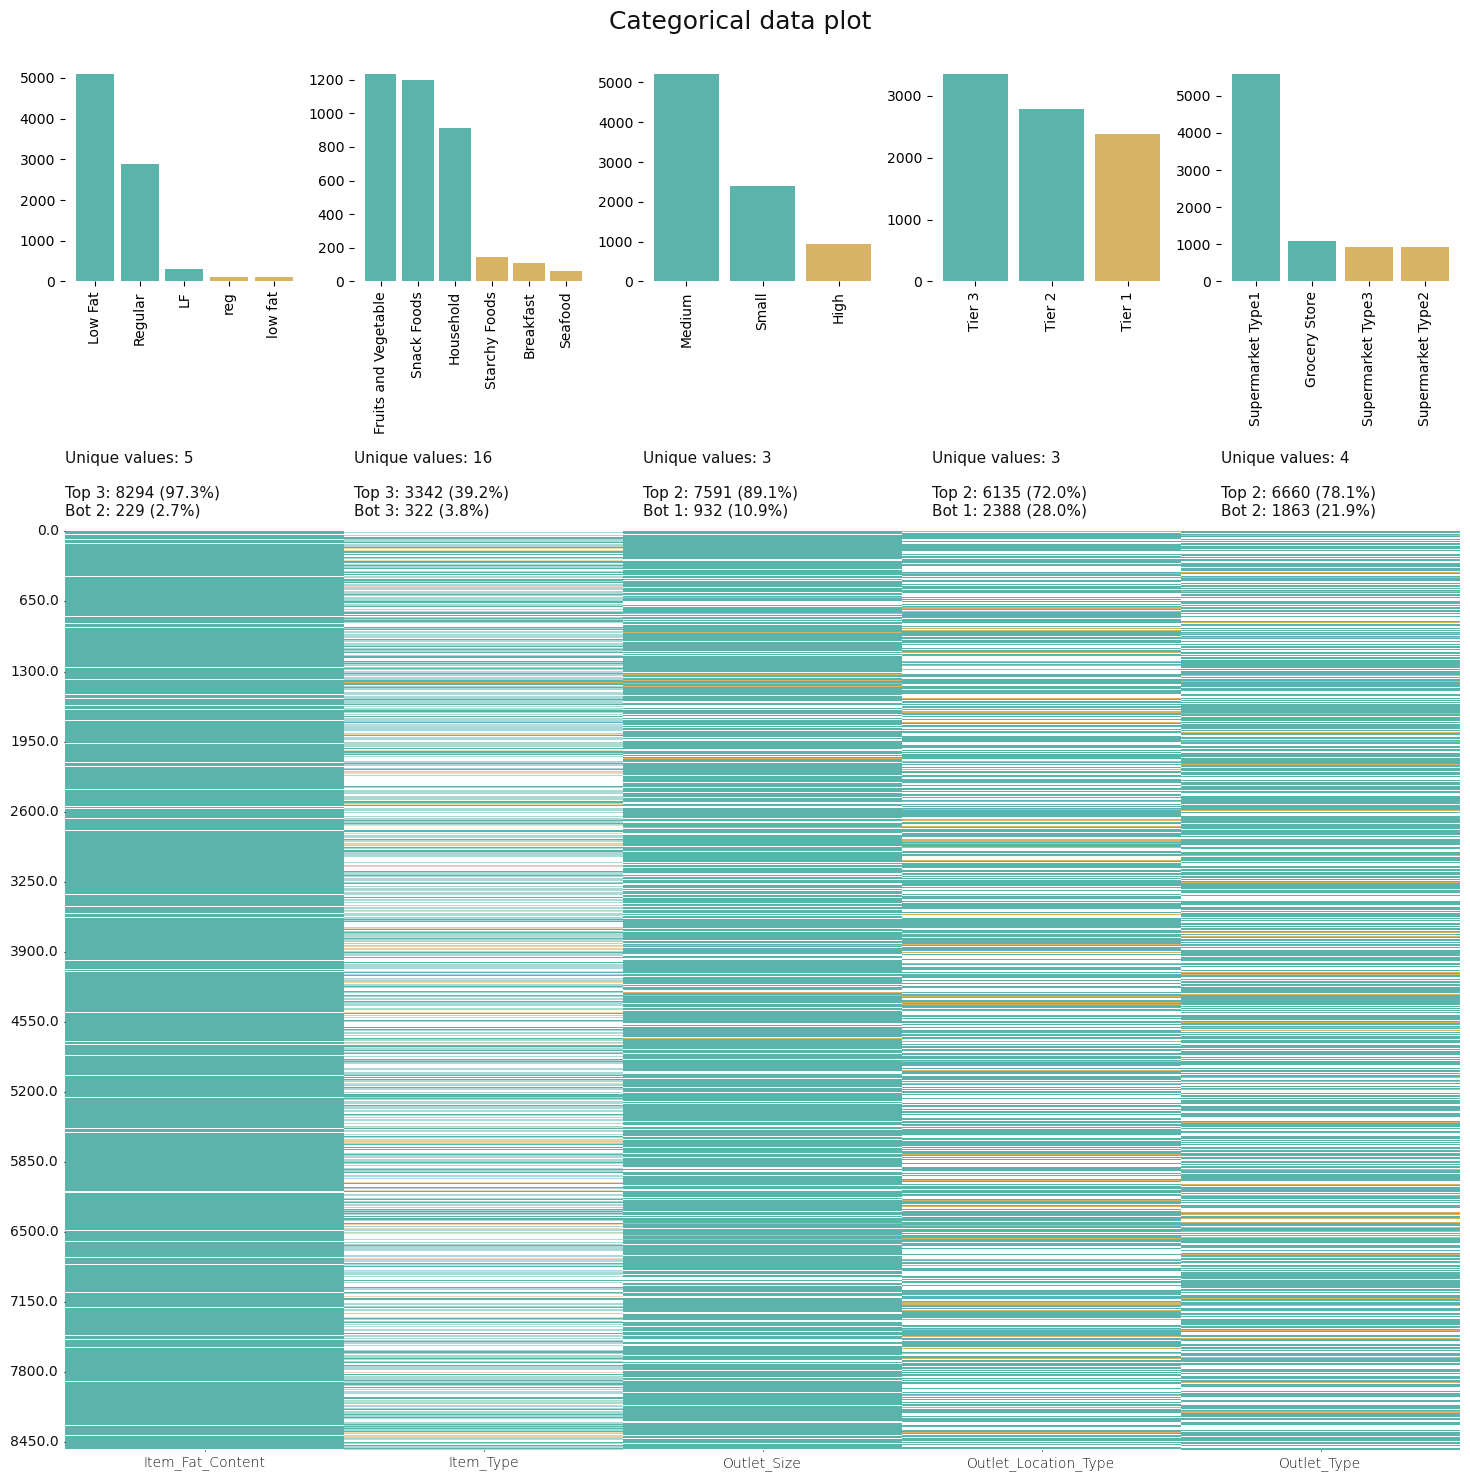

In [32]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features


In [33]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

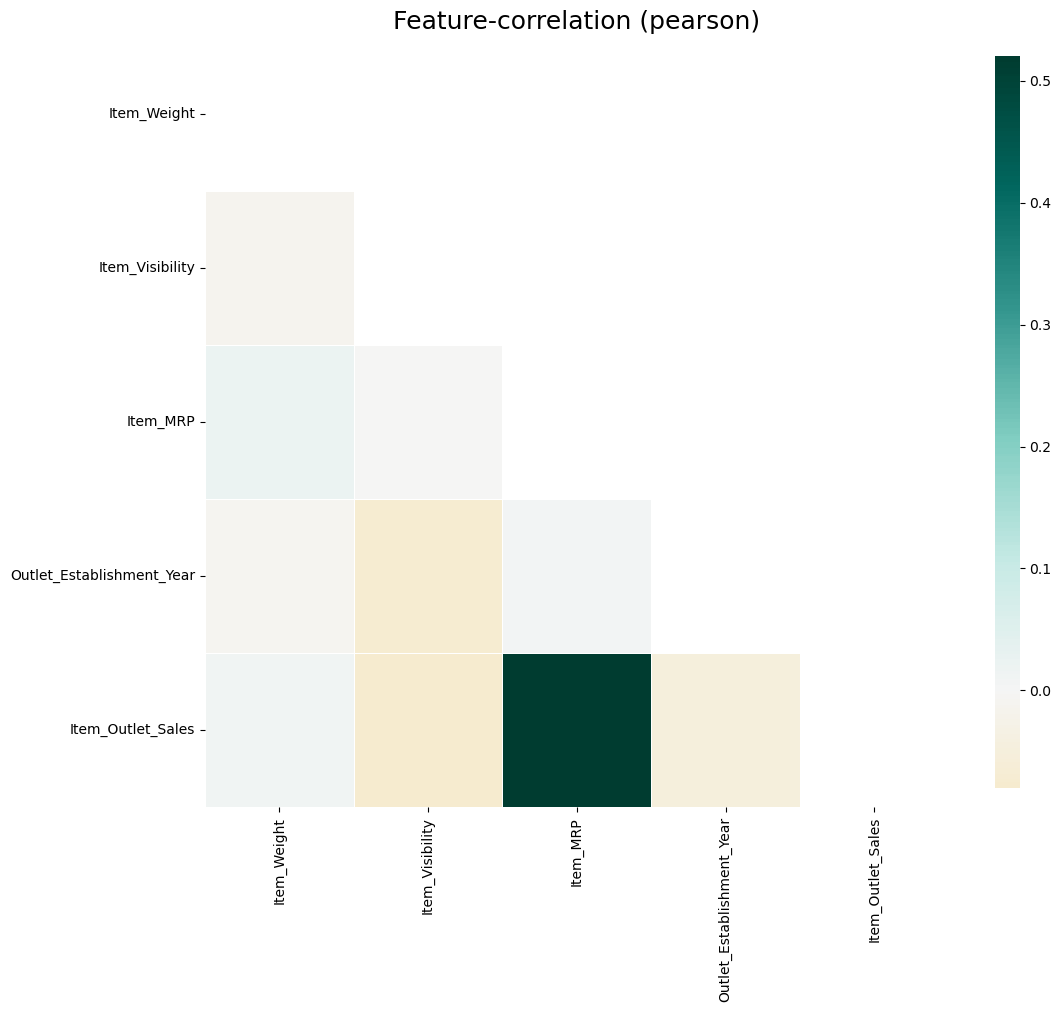

In [34]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations


<Axes: xlabel='Item_Weight', ylabel='Density'>

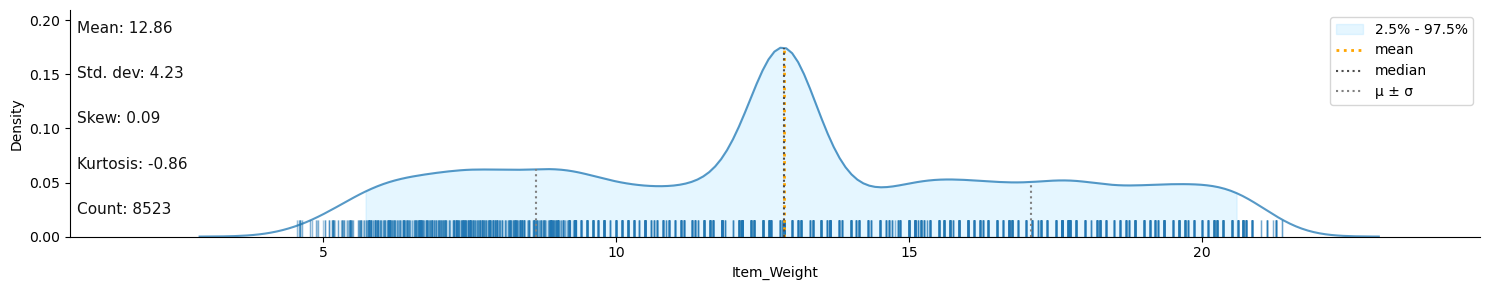

In [35]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature


In [36]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


# Data Cleaning using Klib Library

In [37]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)


Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [38]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [40]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [41]:
klib.mv_col_handling(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


# Preprocessing Task before Model Building

## 1) Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [44]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


# 2) Splitting our data into train and test

In [45]:
X=df_train.drop('item_outlet_sales',axis=1)

In [46]:
Y=df_train['item_outlet_sales']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# 3) Standarization 

In [48]:
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,1.369354,0.066132,7.226681,140.992767,1997.831867,1.170832,1.112871,1.201220
std,4.226130,0.644810,0.051598,4.209990,62.275051,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012802,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [50]:
X_train_std= sc.fit_transform(X_train)

In [51]:
X_test_std= sc.transform(X_test)

In [52]:
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [53]:
X_test_std

array([[-0.43860916, -0.57382672, -0.21609253, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570184, -0.57382672, -0.52943464, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.2184578 ,  0.97378032,  0.16277341, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508101, -0.57382672,  0.8782423 , ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171909, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558541,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [54]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [55]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [56]:
import joblib

In [57]:
joblib.dump(sc,r'/home/pratham2810/Documents/PROJECTS/MACHINE LEARNING PROJECTS/SALES PREDICTION SYSTEM/models/sc_new.sav')

['/home/pratham2810/Documents/PROJECTS/MACHINE LEARNING PROJECTS/SALES PREDICTION SYSTEM/models/sc_new.sav']

# Model Building

In [58]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [59]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [60]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.000000,1,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,1,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,2,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,1,0.049035,6,39.950600,2007,1,1,1
6954,7.550000,1,0.027225,3,152.934006,2002,1,1,1


In [61]:
Y_pred_lr=lr.predict(X_test_std)

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [63]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


0.504187577927004
880.9999044084498
1162.4412631603452


In [64]:
joblib.dump(lr,r'/home/pratham2810/Documents/PROJECTS/MACHINE LEARNING PROJECTS/SALES PREDICTION SYSTEM/models/lr_new.sav')

['/home/pratham2810/Documents/PROJECTS/MACHINE LEARNING PROJECTS/SALES PREDICTION SYSTEM/models/lr_new.sav']

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [66]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [67]:
Y_pred_rf= rf.predict(X_test_std)

In [68]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))


0.5481526380669965
782.4738273358768
1109.7066575540014


# Hyper Parameter Tuning

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)


# Perform grid search with reduced parallelism
grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, 
                                  scoring='r2', error_score=0, verbose=2, cv=2)

# Fit the model
grid_search_forest.fit(X_train_std, Y_train)

# Summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.0s
[CV] END ..................................n_estimators=1000; total time=  10.6s
[CV] END ..................................n_estimators=1000; total time=  10.4s
Best: 0.550 using {'n_estimators': 1000}
0.515 (0.003) with: {'n_estimators': 10}
0.547 (0.007) with: {'n_estimators': 100}
0.550 (0.006) with: {'n_estimators': 1000}


In [70]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [71]:
grid_search_forest.best_score_

0.5495672476341272

In [72]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [73]:
r2_score(Y_test,Y_pred_rf_grid)

0.5485845383804053

# Save your model

In [74]:
import joblib

In [75]:
joblib.dump(grid_search_forest,r'/home/pratham2810/Documents/PROJECTS/MACHINE LEARNING PROJECTS/SALES PREDICTION SYSTEM/models/random_forest_grid_new.sav')

['/home/pratham2810/Documents/PROJECTS/MACHINE LEARNING PROJECTS/SALES PREDICTION SYSTEM/models/random_forest_grid_new.sav']

In [76]:
model = joblib.load(r'/home/pratham2810/Documents/PROJECTS/MACHINE LEARNING PROJECTS/SALES PREDICTION SYSTEM/models/random_forest_grid_new.sav')
